<a href="https://colab.research.google.com/github/markumreed/colab_sklearn/blob/main/covid_and_financial_markets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Data
1. Covid 19 Dataset: John's Hopkins
1. Financial/Stock Data


## Covid 19 Datasets

[John's Hopkins Data](https://github.com/CSSEGISandData/COVID-19) can be found here. 

```shell
git clone https://github.com/CSSEGISandData/COVID-19.git
```

In [ ]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 104397 (delta 0), reused 2 (delta 0), pack-reused 104391
Receiving objects: 100% (104397/104397), 877.56 MiB | 28.90 MiB/s, done.
Resolving deltas: 100% (74021/74021), done.
Checking out files: 100% (970/970), done.


In [ ]:
%%shell
ls COVID-19/archived_data/archived_time_series/

README.md
time_series_19-covid-Confirmed_archived_0325.csv
time_series_19-covid-Deaths_archived_0325.csv
time_series_19-covid-Recovered_archived_0325.csv
time_series_2019-ncov-Confirmed.csv
time_series_2019-ncov-Deaths.csv
time_series_2019-ncov-Recovered.csv


## Preamble

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [ ]:
path = "COVID-19/archived_data/archived_time_series/"
confirmed = pd.read_csv(path + "time_series_2019-ncov-Confirmed.csv")
deaths = pd.read_csv(path + "time_series_2019-ncov-Deaths.csv")
recovered = pd.read_csv(path + "time_series_2019-ncov-Recovered.csv")

In [ ]:
confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 10:24,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
0,Anhui,Mainland China,31.82571,117.2264,NaN,1.0,9.0,15.0,15.0,39.0,39.0,60.0,60.0,70.0,70.0,70.0,106.0,106.0,106.0,152.0,152.0,152.0,200.0,200.0,237.0,297.0,408.0,480.0,480.0,530.0,530.0,591.0,591.0,591.0,665.0,733.0,733.0,779.0,779.0,830.0,830.0,830.0,860.0,889.0,889.0,910.0,910.0,934,934
1,Beijing,Mainland China,40.18238,116.4142,10.0,14.0,22.0,26.0,36.0,36.0,41.0,51.0,68.0,68.0,72.0,80.0,80.0,91.0,91.0,91.0,111.0,111.0,111.0,114.0,139.0,168.0,191.0,212.0,212.0,228.0,253.0,274.0,274.0,274.0,297.0,315.0,315.0,326.0,326.0,337.0,337.0,337.0,342.0,342.0,352.0,366.0,366.0,366,372


In [ ]:
deaths.head(2)

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 10:24,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
0,Anhui,Mainland China,31.82571,117.2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,3.0,3.0,3.0,4.0,4.0,4.0,5.0,5.0,6,6
1,Beijing,Mainland China,40.18238,116.4142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3,3


In [ ]:
recovered.head(2)

,Province/State,Country/Region,Lat,Long,1/21/20 22:00,1/22/20 12:00,1/23/20 12:00,1/24/20 0:00,1/24/20 12:00,1/25/20 0:00,1/25/20 12:00,1/25/20 22:00,1/26/20 11:00,1/26/20 23:00,1/27/20 9:00,1/27/20 19:00,1/27/20 20:30,1/28/20 13:00,1/28/20 18:00,1/28/20 23:00,1/29/20 13:30,1/29/20 14:30,1/29/20 21:00,1/30/20 11:00,1/31/20 14:00,2/1/20 10:00,2/2/20 21:00,2/3/20 21:00,2/4/20 9:40,2/4/20 22:00,2/5/20 9:00,2/5/20 23:00,2/6/20 9:00,2/6/20 14:20,2/7/20 20:13,2/7/20 22:50,2/8/20 10:24,2/8/20 23:04,2/9/20 10:30,2/9/20 23:20,2/10/20 10:30,2/10/20 19:30,2/11/20 10:50,2/11/20 20:44,2/12/20 10:20,2/12/20 22:00,2/13/20 10:00,2/13/20 21:15,2/14/20 11:23
0,Anhui,Mainland China,31.82571,117.2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,3.0,5.0,7.0,14.0,14.0,20.0,23.0,23.0,34.0,34.0,47.0,47.0,59.0,59.0,72.0,73.0,88.0,88.0,105.0,108.0,127.0,128.0,157.0,166,193
1,Beijing,Mainland China,40.18238,116.4142,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,9.0,9.0,12.0,12.0,23.0,24.0,31.0,31.0,31.0,33.0,34.0,34.0,37.0,37.0,44.0,44.0,44.0,48.0,48.0,56.0,68.0,69.0,69,80


## Reshape by Melting

In [ ]:
confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/21/20 22:00',
       '1/22/20 12:00', '1/23/20 12:00', '1/24/20 0:00', '1/24/20 12:00',
       '1/25/20 0:00', '1/25/20 12:00', '1/25/20 22:00', '1/26/20 11:00',
       '1/26/20 23:00', '1/27/20 9:00', '1/27/20 19:00', '1/27/20 20:30',
       '1/28/20 13:00', '1/28/20 18:00', '1/28/20 23:00', '1/29/20 13:30',
       '1/29/20 14:30', '1/29/20 21:00', '1/30/20 11:00', '1/31/20 14:00',
       '2/1/20 10:00', '2/2/20 21:00', '2/3/20 21:00', '2/4/20 9:40',
       '2/4/20 22:00', '2/5/20 9:00', '2/5/20 23:00', '2/6/20 9:00',
       '2/6/20 14:20', '2/7/20 20:13', '2/7/20 22:50', '2/8/20 10:24',
       '2/8/20 23:04', '2/9/20 10:30', '2/9/20 23:20', '2/10/20 10:30',
       '2/10/20 19:30', '2/11/20 10:50', '2/11/20 20:44', '2/12/20 10:20',
       '2/12/20 22:00', '2/13/20 10:00', '2/13/20 21:15', '2/14/20 11:23'],
      dtype='object')

In [ ]:
confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="date", value_name="confirmed")

,Province/State,Country/Region,Lat,Long,date,confirmed
0,Anhui,Mainland China,31.82571,117.2264,1/21/20 22:00,NaN
1,Beijing,Mainland China,40.18238,116.4142,1/21/20 22:00,10.0
2,Chongqing,Mainland China,30.05718,107.8740,1/21/20 22:00,5.0
3,Fujian,Mainland China,26.07783,117.9895,1/21/20 22:00,NaN
4,Gansu,Mainland China,36.06110,103.8343,1/21/20 22:00,NaN
...,...,...,...,...,...,...
3325,NaN,Belgium,50.50390,4.4699,2/14/20 11:23,1.0
3326,"Madison, WI",US,43.07310,-89.4012,2/14/20 11:23,1.0
3327,Diamond Princess cruise ship,Others,35.44370,129.6380,2/14/20 11:23,218.0
3328,"San Diego County, CA",US,32.71570,-117.1611,2/14/20 11:23,2.0


In [ ]:
def covid_melt(df, value_name=None):
  return df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name="date", value_name=value_name)

In [ ]:
confirmed_melt = covid_melt(confirmed, "confirmed")
deaths_melt = covid_melt(deaths, "deaths")
recovered_melt = covid_melt(recovered, "recovered")

In [ ]:
covid_data = confirmed_melt.merge(deaths_melt).merge(recovered_melt)

In [ ]:
covid_data.head(2)

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered
0,Anhui,Mainland China,31.82571,117.2264,1/21/20 22:00,NaN,NaN,NaN
1,Beijing,Mainland China,40.18238,116.4142,1/21/20 22:00,10.0,NaN,NaN


In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 0 to 3329
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  2385 non-null   object 
 1   Country/Region  3330 non-null   object 
 2   Lat             3330 non-null   float64
 3   Long            3330 non-null   float64
 4   date            3330 non-null   object 
 5   confirmed       2706 non-null   float64
 6   deaths          1184 non-null   float64
 7   recovered       1508 non-null   float64
dtypes: float64(5), object(3)
memory usage: 234.1+ KB


## Date to DateTime Object

In [ ]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [ ]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered
0,Anhui,Mainland China,31.82571,117.2264,2020-01-21 22:00:00,NaN,NaN,NaN
1,Beijing,Mainland China,40.18238,116.4142,2020-01-21 22:00:00,10.0,NaN,NaN
2,Chongqing,Mainland China,30.05718,107.8740,2020-01-21 22:00:00,5.0,NaN,NaN
3,Fujian,Mainland China,26.07783,117.9895,2020-01-21 22:00:00,NaN,NaN,NaN
4,Gansu,Mainland China,36.06110,103.8343,2020-01-21 22:00:00,NaN,NaN,NaN


In [ ]:
covid_data.set_index('date', inplace=True)

In [ ]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,confirmed,deaths,recovered
date,,,,,,,
2020-01-21 22:00:00,Anhui,Mainland China,31.82571,117.2264,NaN,NaN,NaN
2020-01-21 22:00:00,Beijing,Mainland China,40.18238,116.4142,10.0,NaN,NaN
2020-01-21 22:00:00,Chongqing,Mainland China,30.05718,107.8740,5.0,NaN,NaN
2020-01-21 22:00:00,Fujian,Mainland China,26.07783,117.9895,NaN,NaN,NaN
2020-01-21 22:00:00,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,NaN


In [ ]:
covid_data.columns = [c.lower().replace("/","_") for c in covid_data.columns]

In [ ]:
covid_data.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered
date,,,,,,,
2020-01-21 22:00:00,Anhui,Mainland China,31.82571,117.2264,NaN,NaN,NaN
2020-01-21 22:00:00,Beijing,Mainland China,40.18238,116.4142,10.0,NaN,NaN
2020-01-21 22:00:00,Chongqing,Mainland China,30.05718,107.8740,5.0,NaN,NaN
2020-01-21 22:00:00,Fujian,Mainland China,26.07783,117.9895,NaN,NaN,NaN
2020-01-21 22:00:00,Gansu,Mainland China,36.06110,103.8343,NaN,NaN,NaN


## Filling NA values

1. confirmed
1. deaths
1. recovered

In [ ]:
fill_values = {"confirmed":0, "recovered":0, "deaths":0} # fill values dictionary; helps control which variables are filled

For the variables confirmed, recovered, and deaths we fill the NaN with zeros. For all other variables, we left the missing values as NaN.

In [ ]:
covid_data.fillna(value=fill_values)

,province_state,country_region,lat,long,confirmed,deaths,recovered
date,,,,,,,
2020-01-21 22:00:00,Anhui,Mainland China,31.82571,117.2264,0.0,0.0,0.0
2020-01-21 22:00:00,Beijing,Mainland China,40.18238,116.4142,10.0,0.0,0.0
2020-01-21 22:00:00,Chongqing,Mainland China,30.05718,107.8740,5.0,0.0,0.0
2020-01-21 22:00:00,Fujian,Mainland China,26.07783,117.9895,0.0,0.0,0.0
2020-01-21 22:00:00,Gansu,Mainland China,36.06110,103.8343,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2020-02-14 11:23:00,NaN,Belgium,50.50390,4.4699,1.0,0.0,0.0
2020-02-14 11:23:00,"Madison, WI",US,43.07310,-89.4012,1.0,0.0,0.0
2020-02-14 11:23:00,Diamond Princess cruise ship,Others,35.44370,129.6380,218.0,0.0,0.0


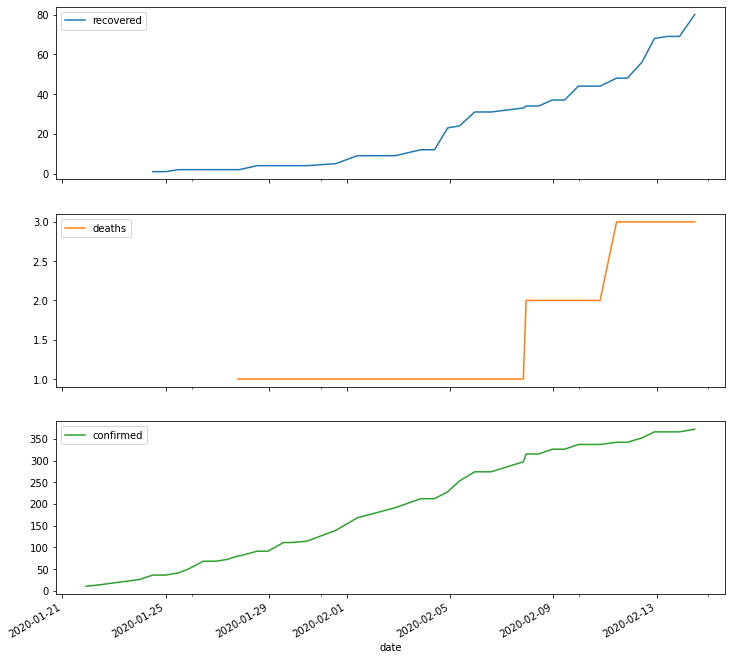

In [ ]:
covid_data.query("province_state == 'Beijing'")[['recovered','deaths','confirmed']].plot(kind="line", subplots=True, figsize=(12,12));

# Financial Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=0780bfb8a2e0b432a968f8305e0f122bc49da57a1de9fc0bc6ba8e205a4c2d26
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf

## Basic Example

In [4]:
msft = yf.Ticker("MSFT")

In [5]:
msft.info

{'52WeekChange': 0.521708,
 'SandP52WeekChange': 0.4136821,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 234.83,
 'askSize': 1400,
 'averageDailyVolume10Day': 33823728,
 'averageVolume': 29763468,
 'averageVolume10days': 33823728,
 'beta': 0.812567,
 'beta3Year': None,
 'bid': 234.87,
 'bidSize': 1000,
 'bookValue': 17.259,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1614297600,
 'dayHigh': 236.99,
 'dayLow': 233.82,
 'dividendRate': 2.24,
 'dividendYield': 0.0095999995,
 'earningsQuarterlyGrowth': 0.327,
 'enterpriseToEbitda': 23.91,
 'enterpriseToRevenue': 11.182,
 'enterpriseValue': 1714012160000,
 'exDividendDate': 1613520000,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'expireDate': None,
 'fiftyDayAverage': 235.3283,
 'fif

In [6]:
hist = msft.history(period="max")

In [7]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056238,0.064508,0.056238,0.061751,1031788800,0.0,0.0
1986-03-14,0.061751,0.065059,0.061751,0.063956,308160000,0.0,0.0
1986-03-17,0.063956,0.065610,0.063956,0.065059,133171200,0.0,0.0
1986-03-18,0.065059,0.065610,0.062853,0.063405,67766400,0.0,0.0
1986-03-19,0.063405,0.063956,0.061751,0.062302,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-03-04,226.740005,232.490005,224.259995,226.729996,44584200,0.0,0.0
2021-03-05,229.520004,233.270004,226.460007,231.600006,41842100,0.0,0.0
2021-03-08,231.369995,233.369995,227.130005,227.389999,35245900,0.0,0.0


In [9]:
msft.actions # dividends, splits

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0
2020-08-19,0.51,0.0


In [10]:
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2020-02-19    0.51
2020-05-20    0.51
2020-08-19    0.51
2020-11-18    0.56
2021-02-17    0.56
Name: Dividends, Length: 69, dtype: float64

In [11]:
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [14]:
msft.major_holders

,0,1
0,0.06%,% of Shares Held by All Insider
1,71.84%,% of Shares Held by Institutions
2,71.89%,% of Float Held by Institutions
3,4849,Number of Institutions Holding Shares


In [15]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",614100233,2020-12-30,0.0814,136588173823
1,Blackrock Inc.,515509179,2020-12-30,0.0683,114659551593
2,State Street Corporation,299126371,2020-12-30,0.0397,66531687437
3,"FMR, LLC",222257473,2020-12-30,0.0295,49434507144
4,Price (T.Rowe) Associates Inc,177500157,2020-12-30,0.0235,39479584919
5,"Geode Capital Management, LLC",117798162,2020-12-30,0.0156,26200667192
6,Capital World Investors,110441260,2020-12-30,0.0146,24564345049
7,Capital Research Global Investors,95506129,2020-12-30,0.0127,21242473212
8,Capital International Investors,91995988,2020-12-30,0.0122,20461747650
9,Northern Trust Corporation,91215100,2020-12-30,0.0121,20288062542


In [17]:
msft.cashflow

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [18]:
msft.earnings

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [19]:
msft.sustainability

,Value
2021-3,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [20]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-01-27 17:44:01,B of A Securities,Buy,,main
2021-01-28 18:11:05,Argus Research,Buy,,main
2021-02-02 10:28:34,Piper Sandler,Overweight,,reit


In [21]:
msft.recommendations['To Grade'].value_counts()

Buy               90
Overweight        67
Outperform        60
Neutral           37
Hold              14
Market Perform    10
Sell              10
Strong Buy         8
Equal-Weight       6
Underperform       6
Underweight        2
Sector Perform     2
Long-Term Buy      1
Perform            1
                   1
Name: To Grade, dtype: int64

In [22]:
msft.calendar

,0,1
Earnings Date,2021-04-27 00:00:00,2021-05-03 00:00:00
Earnings Average,1.77,1.77
Earnings Low,1.69,1.69
Earnings High,1.93,1.93
Revenue Average,41032800000,41032800000
Revenue Low,40541000000,40541000000
Revenue High,41894000000,41894000000


In [23]:
msft.isin

'US5949181045'

In [24]:
msft.options

('2021-03-12',
 '2021-03-19',
 '2021-03-26',
 '2021-04-01',
 '2021-04-09',
 '2021-04-16',
 '2021-04-23',
 '2021-05-21',
 '2021-06-18',
 '2021-07-16',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

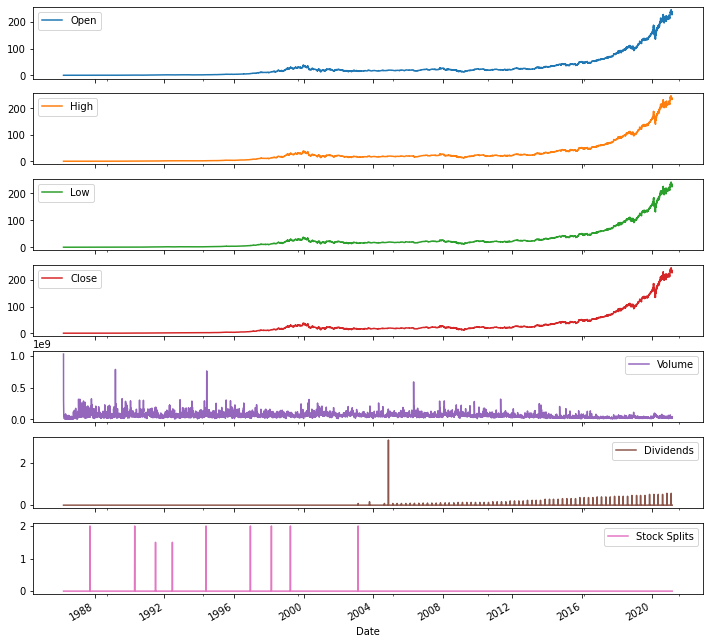

In [27]:
hist.plot(kind="line", figsize=(12, 12), subplots=True);

## Adv. Financial Data Gathering

In [28]:
#Major Indicies
major_indices = pd.read_html("https://finance.yahoo.com/world-indices")[0]

In [29]:
major_indices.head()

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,3903.47,28.03,+0.72%,1.458B,NaN,NaN,NaN
1,^DJI,Dow 30,32264.35,431.61,+1.36%,233.622M,NaN,NaN,NaN
2,^IXIC,Nasdaq,13096.69,22.86,+0.17%,3.624B,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),15503.10,127.47,+0.83%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,2774.44,29.25,+1.07%,0,NaN,NaN,NaN


In [34]:
ticker_list = major_indices['Symbol'].str.replace("^","").str.lower().to_list()

In [39]:
len(ticker_list)

36

In [38]:
df = yf.download(ticker_list, period="1d", start="2020-01-13", end="2021-03-10")

[*********************100%***********************]  36 of 36 completed

29 Failed downloads:
- IPSA: No data found, symbol may be delisted
- GDAXI: No data found, symbol may be delisted
- GSPTSE: No data found, symbol may be delisted
- VIX: No data found for this date range, symbol may be delisted
- TA125.TA: No data found, symbol may be delisted
- KLSE: No data found for this date range, symbol may be delisted
- N100: No data found, symbol may be delisted
- RUT: No data found for this date range, symbol may be delisted
- CASE30: No data found, symbol may be delisted
- NZ50: No data found, symbol may be delisted
- JKSE: No data found, symbol may be delisted
- BUK100P: No data found, symbol may be delisted
- KS11: No data found, symbol may be delisted
- MXX: No data found for this date range, symbol may be delisted
- AORD: No data found, symbol may be delisted
- GSPC: No data found, symbol may be delisted
- TWII: No data found, symbol may be delisted
- BFX: No data found for this date r

In [41]:
df.columns

MultiIndex([('Adj Close', '000001.SS'),
            ('Adj Close', '399001.SZ'),
            ('Adj Close',      'AORD'),
            ('Adj Close',      'AXJO'),
            ('Adj Close',       'BFX'),
            ('Adj Close',     'BSESN'),
            ('Adj Close',   'BUK100P'),
            ('Adj Close',      'BVSP'),
            ('Adj Close',    'CASE30'),
            ('Adj Close',       'DJI'),
            ...
            (   'Volume',      'N225'),
            (   'Volume',       'NYA'),
            (   'Volume',      'NZ50'),
            (   'Volume',       'RUT'),
            (   'Volume',       'STI'),
            (   'Volume',  'STOXX50E'),
            (   'Volume',  'TA125.TA'),
            (   'Volume',      'TWII'),
            (   'Volume',       'VIX'),
            (   'Volume',       'XAX')],
           length=216)

In [42]:
df.head()

Adj Close                          ...   Volume              
              000001.SS     399001.SZ AORD AXJO  ... TA125.TA TWII VIX  XAX
Date                                             ...                       
2020-01-13  3115.570068  11040.200195  NaN  NaN  ...      NaN  NaN NaN  0.0
2020-01-14  3106.820068  10988.769531  NaN  NaN  ...      NaN  NaN NaN  NaN
2020-01-15  3090.040039  10972.320312  NaN  NaN  ...      NaN  NaN NaN  NaN
2020-01-16  3074.081055  10967.440430  NaN  NaN  ...      NaN  NaN NaN  NaN
2020-01-17  3075.496094  10954.389648  NaN  NaN  ...      NaN  NaN NaN  0.0

[5 rows x 216 columns]

In [43]:
adj_close = df.dropna(thresh=10, axis=1)['Adj Close']

In [44]:
adj_close.head()

,000001.SS,399001.SZ,DJI,HSI,IMOEX.ME,NYA,XAX
Date,,,,,,,
2020-01-13,3115.570068,11040.200195,28907.099609,NaN,3151.689941,14042.599609,2576.770020
2020-01-14,3106.820068,10988.769531,28939.699219,NaN,3129.770020,NaN,NaN
2020-01-15,3090.040039,10972.320312,29030.199219,NaN,3132.629883,NaN,NaN
2020-01-16,3074.081055,10967.440430,29297.599609,NaN,3157.229980,NaN,NaN
2020-01-17,3075.496094,10954.389648,29348.099609,NaN,3196.879883,14183.200195,2622.090088


In [45]:
adj_close.describe().T

,count,mean,std,min,25%,50%,75%,max
000001.SS,278.0,3194.245617,267.324450,2660.169922,2924.339294,3279.262451,3386.254456,3696.167969
399001.SZ,278.0,12718.656946,1658.804445,9691.530273,11057.652100,13257.370117,13853.695068,15962.250000
DJI,277.0,27488.614889,2846.177471,18591.900391,25766.599609,27930.300781,29591.300781,31961.900391
HSI,275.0,25736.542898,1949.437253,21696.099609,24355.200195,25113.800781,26687.450195,31084.900391
IMOEX.ME,288.0,2951.681595,292.116425,2112.639893,2761.492493,2924.359985,3143.559937,3495.260010
NYA,260.0,12932.181720,1510.599379,8777.379883,11921.824707,12913.699707,14116.900146,15539.400391
XAX,55.0,2091.009624,391.203394,1487.229980,1732.345032,2261.629883,2425.039917,2622.090088


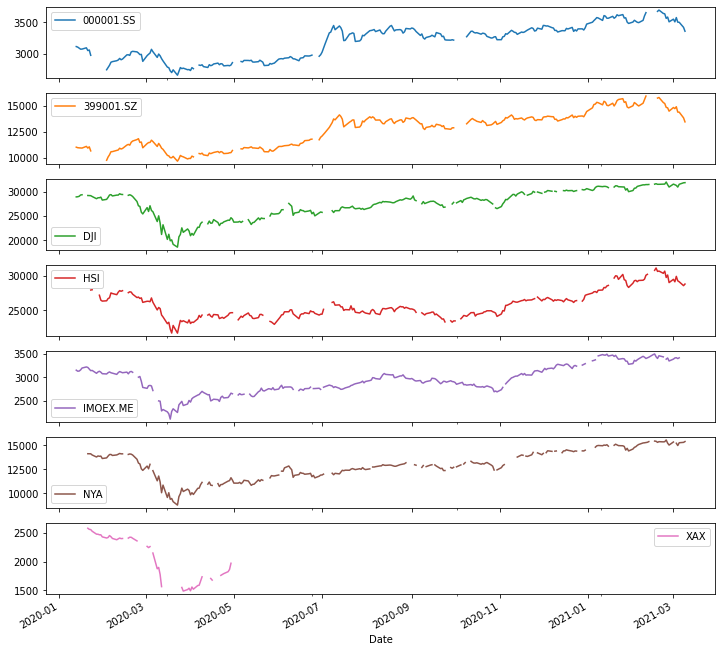

In [48]:
adj_close.plot(figsize=(12,12), subplots=True);

Will drop XAX due to lack of viable data.

In [49]:
adj_close = adj_close.drop("XAX", axis=1)

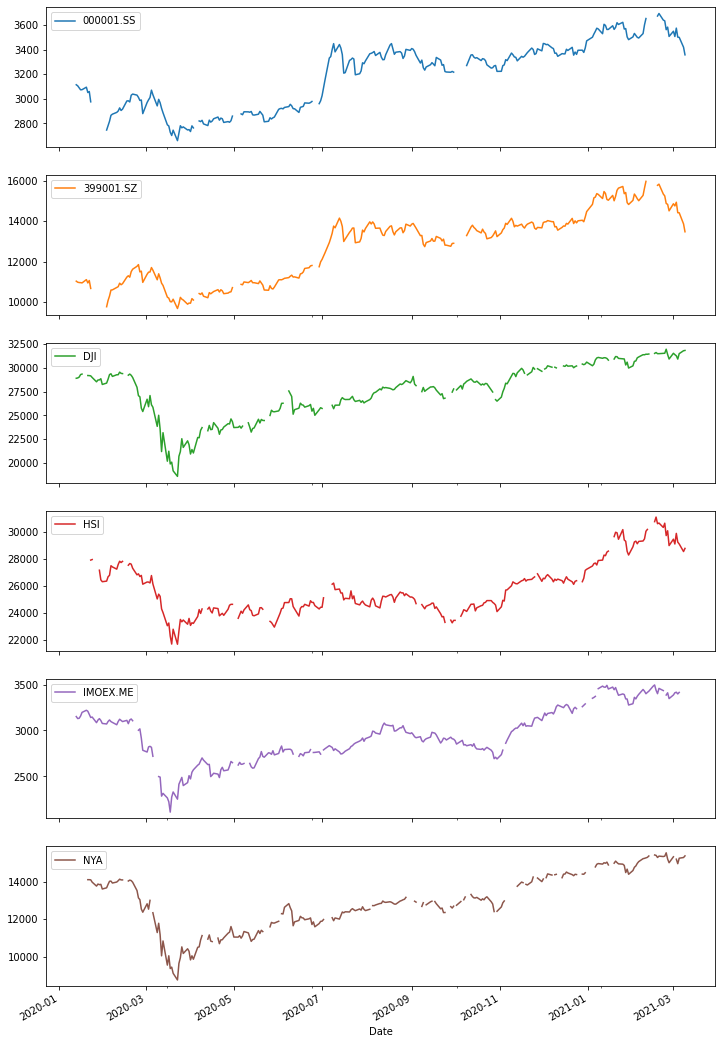

In [51]:
adj_close.plot(figsize=(12,20), subplots=True);

In [52]:
dji = adj_close['DJI']

In [55]:
dji.resample("4M").mean()

Date
2020-01-31    28940.228516
2020-05-31    24569.870515
2020-09-30    27007.932568
2021-01-31    29522.922440
2021-05-31    31332.573167
Freq: 4M, Name: DJI, dtype: float64

In [58]:
dji

Date
2020-01-13    28907.099609
2020-01-14    28939.699219
2020-01-15    29030.199219
2020-01-16    29297.599609
2020-01-17    29348.099609
                  ...     
2021-03-03    31270.099609
2021-03-04    30924.099609
2021-03-05    31496.300781
2021-03-08    31802.400391
2021-03-09    31832.699219
Name: DJI, Length: 301, dtype: float64

In [59]:
dji.shift(1)

Date
2020-01-13             NaN
2020-01-14    28907.099609
2020-01-15    28939.699219
2020-01-16    29030.199219
2020-01-17    29297.599609
                  ...     
2021-03-03    31391.500000
2021-03-04    31270.099609
2021-03-05    30924.099609
2021-03-08    31496.300781
2021-03-09    31802.400391
Name: DJI, Length: 301, dtype: float64

In [60]:
dji_per_change = dji / (dji.shift(1) - 1)

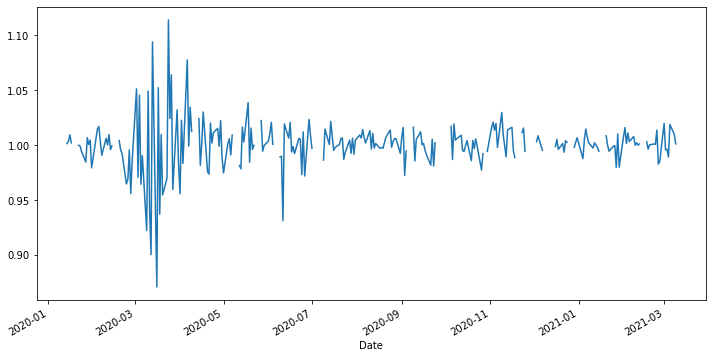

In [62]:
dji_per_change.plot(figsize=(12,6))

In [63]:
dji_log_returns_shift = np.log(dji / dji.shift(1))

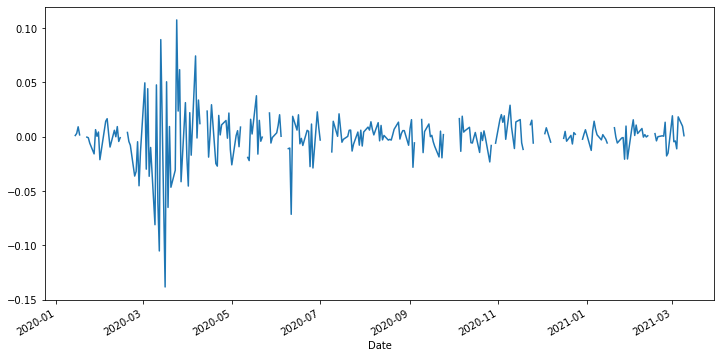

In [64]:
dji_log_returns_shift.plot(figsize=(12,6));

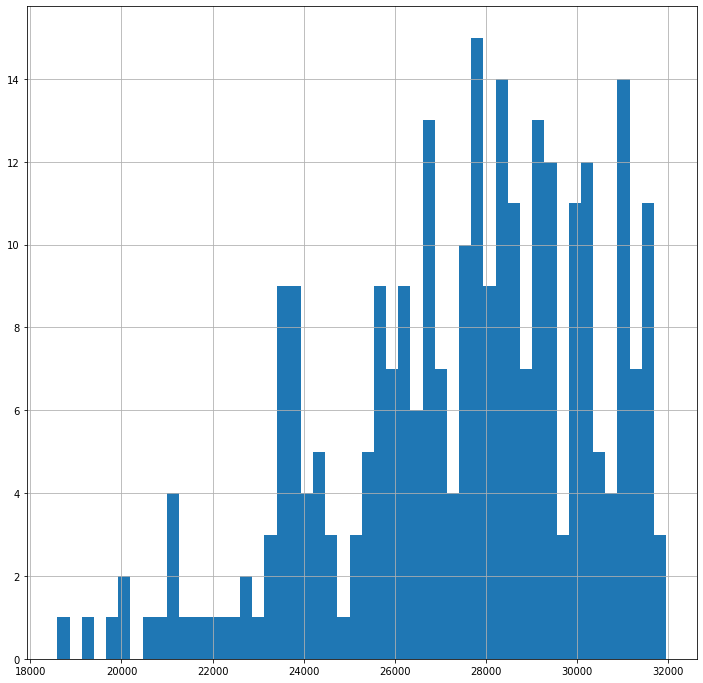

In [67]:
dji.hist(bins=50, figsize=(12,12));

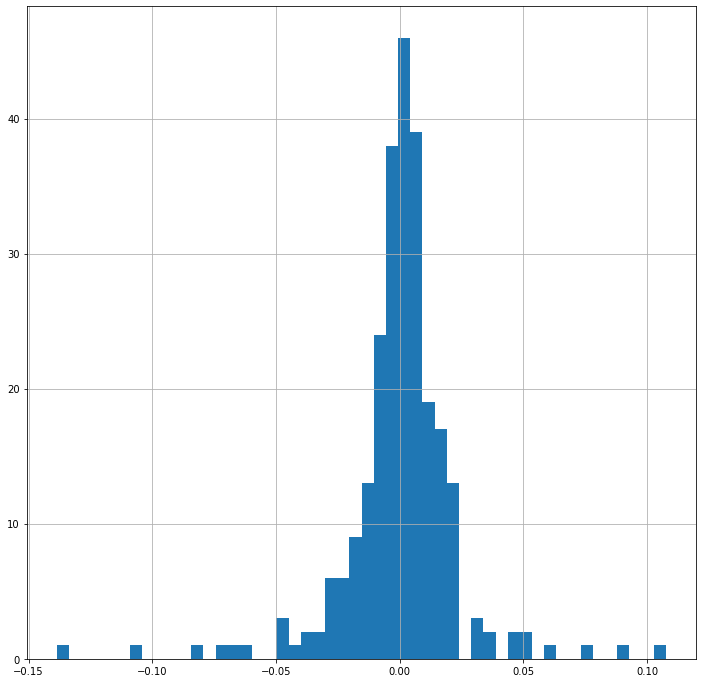

In [68]:
dji_log_returns_shift.hist(bins=50, figsize=(12,12));

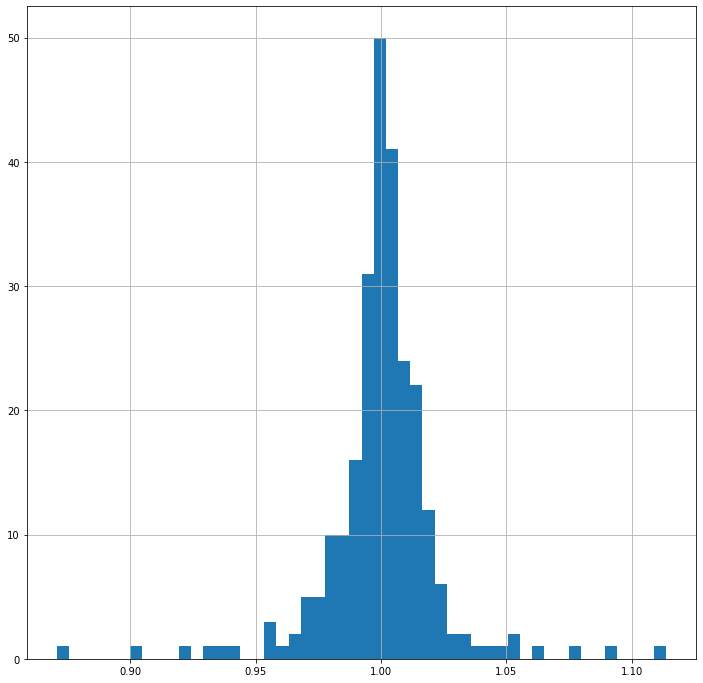

In [69]:
dji_per_change.hist(bins=50, figsize=(12,12));